## K-means - Ejemplo 1

In [1]:
# Librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

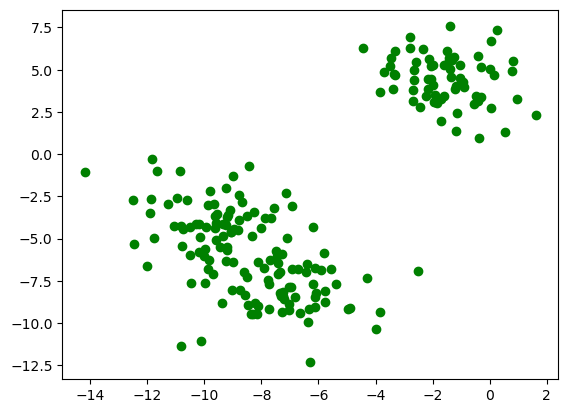

In [2]:
# Datos
np.random.seed(1)

X,YReal = make_blobs(centers=3,cluster_std=1.5,n_samples=200)
plt.scatter(X[:, 0], X[:, 1], c='green')
plt.show()

# Clusters finales
YH = np.zeros(YReal.shape[0])

In [4]:
YH

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

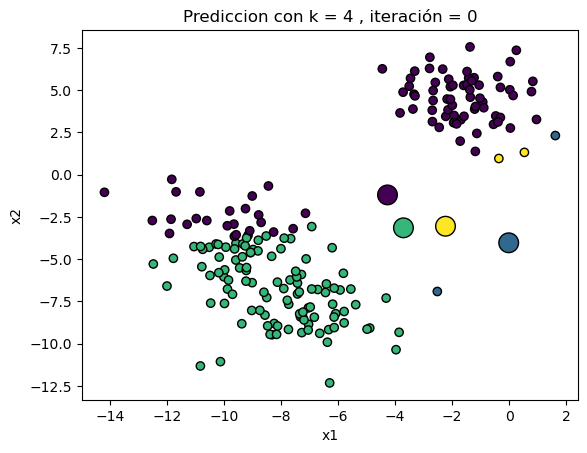

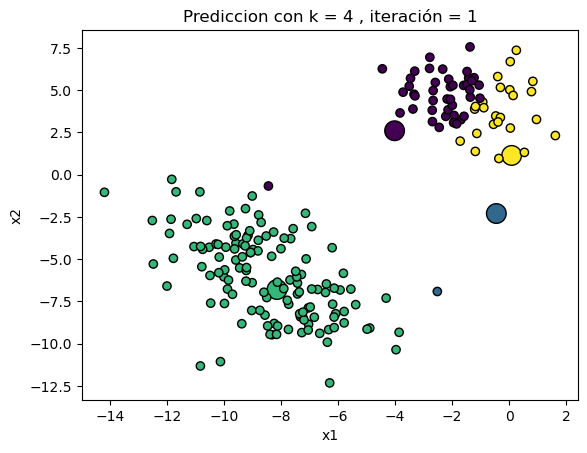

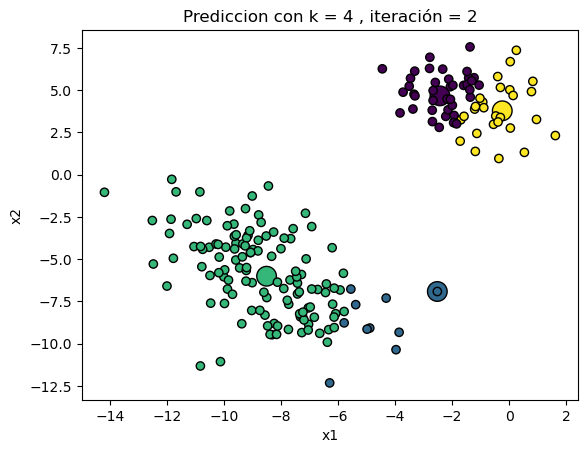

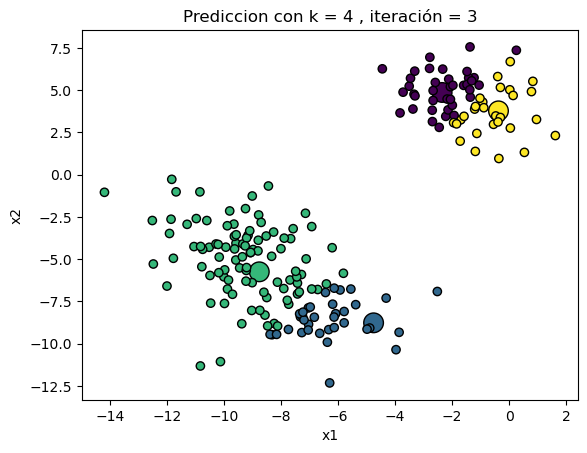

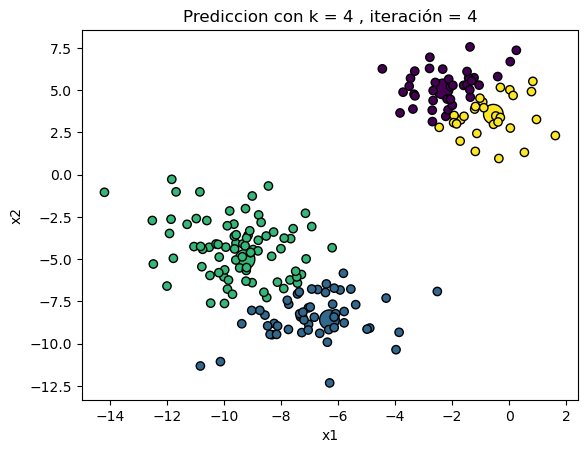

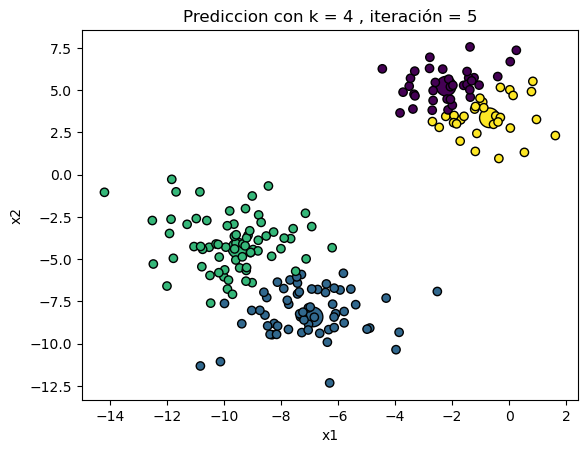

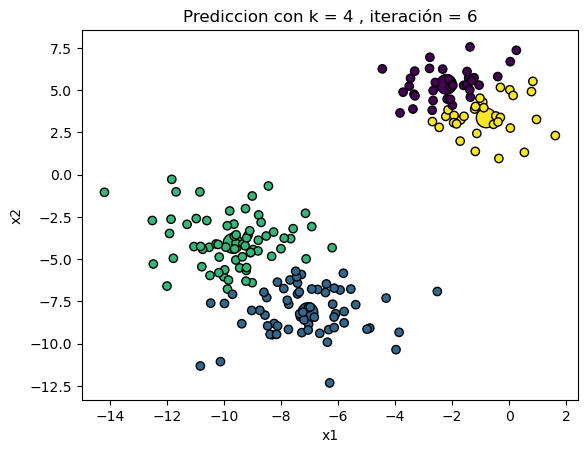

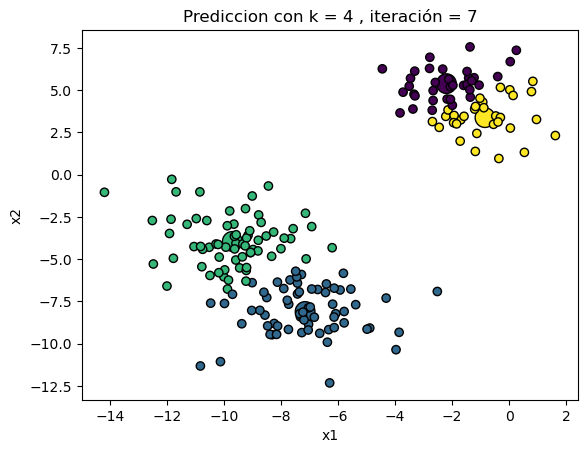

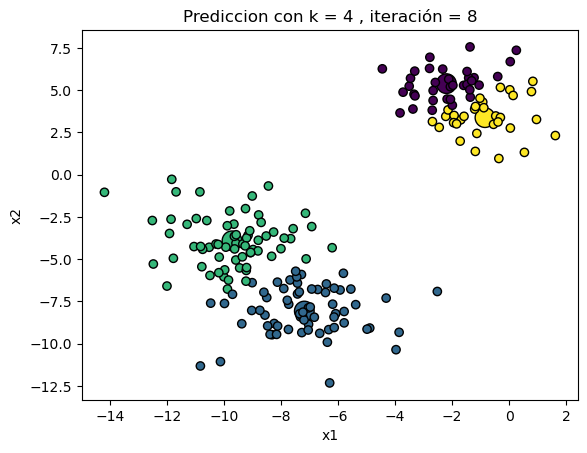

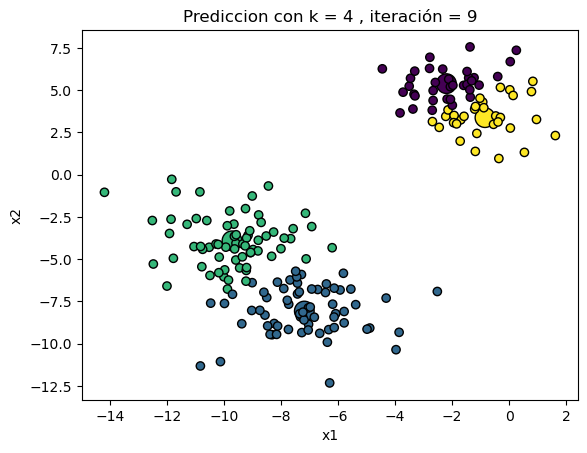

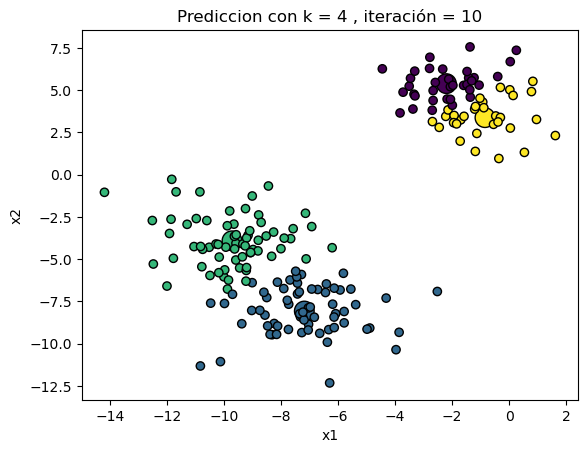

In [11]:
######## Inicializa
K = 4
centroides = np.random.random((K,X.shape[1])) * X.mean()
itera      = 0
iteraMax   = 10
logCentroides = []
logCentroides.append(centroides)

while itera <= iteraMax:
    
    suma  = np.zeros((K,X.shape[1]+1)) 
    new_centroides = np.zeros((K,X.shape[1]))
    
    ######## Observa    
    for i, x in enumerate(X):    
        
        # Calcular distancias con todos los centroides
        distancias = np.linalg.norm(centroides - x, axis=1)
        
        # Obtener más cercano 
        cercano = distancias.argsort()[0]
        
        # Asignar cercano    
        YH[i] = cercano
        suma[cercano,:X.shape[1]] = suma[cercano,:X.shape[1]] + x
        suma[cercano,X.shape[1]] += 1
        
    
    # Mostrar clusters
    ax=plt.gca()
    ax.scatter(centroides[:,0], centroides[:,1], c=range(centroides.shape[0]), ec='k', s=200)
    ax.scatter(X[:, 0], X[:, 1], c=YH, ec='k',)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Prediccion con k = " + str(K) + " , iteración = " + str(itera))
    plt.show()

        
    ####### Actualiza
        
    # Recalcular centroides
    for j in range(X.shape[1]):
        new_centroides[:,j] = suma[:,j] / suma[:,2]

        
    centroides = new_centroides   
    logCentroides.append(centroides)
    itera+=1

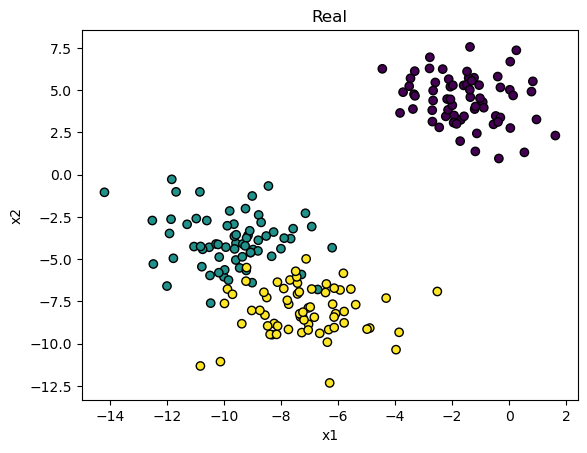

In [6]:
# Mostrar clusters "originales"
ax=plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=YReal, ec='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Real")
plt.show()

In [10]:
logCentroides

[array([[0.0197751 , 0.860237  ],
        [0.55890381, 0.40322047],
        [0.75874693, 0.716929  ]]),
 array([[-6.29165887, -1.54673598],
        [-6.03360724, -8.7279876 ],
        [ 1.03668765,  2.2975679 ]]),
 array([[-9.65078261, -3.47118366],
        [-7.6178712 , -7.74768849],
        [-1.55424315,  4.42306677]]),
 array([[-9.76114128, -3.77964254],
        [-7.28621566, -7.9588189 ],
        [-1.55424315,  4.42306677]]),
 array([[-9.72166482, -3.83610261],
        [-7.25115858, -8.02776667],
        [-1.55424315,  4.42306677]]),
 array([[-9.71415772, -3.87350785],
        [-7.22168041, -8.05348187],
        [-1.55424315,  4.42306677]]),
 array([[-9.71655273, -3.91677348],
        [-7.1814843 , -8.07289363],
        [-1.55424315,  4.42306677]]),
 array([[-9.71655273, -3.91677348],
        [-7.1814843 , -8.07289363],
        [-1.55424315,  4.42306677]]),
 array([[-9.71655273, -3.91677348],
        [-7.1814843 , -8.07289363],
        [-1.55424315,  4.42306677]]),
 array([[-9.7165